In [1]:
import itertools
import random
import pprint
import matplotlib.pyplot as plt
import math
import doctest

# A few comments regarding the implementation
- we represent words simply as tuples.
- sets are represented as python sets
- `function(*list)` takes a function expecting an arbitrary number of arguments and a list and calls this function with the elements of the list unpacked 

In [2]:
def word_list(n,alphabet):
    """Return a list of all words of length n over the alphabet
    >>> word_list(3,[1,2])
    {(1, 2, 1), (2, 1, 1), (2, 2, 2), (1, 1, 2), (1, 2, 2), (2, 1, 2), (2, 2, 1), (1, 1, 1)}
    """
    return set(itertools.product(*(n*[alphabet])))

In [3]:
def superwords(w,n,alphabet):
    """
    Return a set of all words of length n over the alphbaet, which contain w
    >>> superwords((0,1),3,(0,1))
    {(0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 1)}
    """
    words = set()
    w = tuple(w) # Turn w into a tuple, so we are also OK with getting lists
    m = len(w)
    if m>n:
        return set()
    if m==n:
        return set([w])
    else:
        for prefix_len in range(n-m+1):
            suffix_len = n-m-prefix_len
            for prefix in word_list(prefix_len,alphabet):
                for suffix in word_list(suffix_len,alphabet):
                    words.add(prefix+w+suffix)
    return words
                

In [4]:
def naive_forbidden_words_of_length_n(forbidden_words,n,alphabet):
    """Return all words of length n which contain one of the forbidden words"""
    return set.union(*(superwords(w,n,alphabet) for w in forbidden_words))

def naive_allowed_words_of_length_n(forbidden_words,n,alphabet):
    """Return all words of length n which contain non of the forbidden words"""
    return set(word_list(n,alphabet)).difference(naive_forbidden_words_of_length_n(forbidden_words,n,alphabet))

def is_extendable(w,words,alphabet):
    """Check if w can be extended by a symbol
    - to the left, such that the maximal proper prefix of the extension is in words
    - to the right, such that the maximal proper suffix of the extension is in words
    """
    m = len(w)
    left_extendable = False
    right_extendable = False
    for a in alphabet:
        left_ext = (a,)+w[:-1]
        if left_ext in words:
            left_extendable = True
            #print (w,left_ext)
            break
    if (not left_extendable):
        return False
    for a in alphabet:
        right_ext = w[1:]+(a,)
        if right_ext in words:
            right_extendable = True
            #print (w,right_ext)
            break
    if (not right_extendable):
        return False
    return True

def extendable_allowed_words(words,alphabet):
    """
    Given a list of allowed words of equal length n, find the
    maximal subset such that each words is left- and right extendable
    assuming the subshift under consideration is an n-step SFT
    """
    current_word_list = set(words)
    made_change = True
    while(made_change):
        made_change = False
        for w in current_word_list:
            if not is_extendable(w,current_word_list,alphabet):
                current_word_list.remove(w)
                made_change = True
                break
    return current_word_list

def language(forbidden_words,n,alphabet):
    """
    Returns the set of n-words for an n-step
    SFT with forbidden words `forbidden_words`
    """
    naive_allowed_words = naive_allowed_words_of_length_n(forbidden_words,n,alphabet)
    return extendable_allowed_words(naive_allowed_words,alphabet)
    

def prefixes(words,n):
    """
    Returns all prefixes of all words in `words`
    """
    return set(w[0:i] for w in words for i in range(n+1))

def prefixes_of_length_n(words,n):
    """
    Returns all prefixes of length n
    of all words in `words`
    """
    return set(w[0:n] for w in words)
    
def string_list_to_word_set(l):
    """
    Helper function which turns 
    a list of strings into a set of words (i.e tuples of integers)
    """
    return set(tuple(int(i) for i in w) for w in l)
    
def word_set_to_string_list(l):
    """ 
    Helper function which a set of words (i.e tuples of integers)
    into a list of strings for pretty printing
    """
    return ["".join(str(i) for i in w) for w in l]
    

def first_offenders(forbidden_words):
    """
    Find the first_offenders for the SFT defined by `forbidden_words`
    We use the fact that every first offender is contained
    in a forbidden word which only contains this first offender
    """
    n = max(len(x) for x in forbidden_words)
    allowed_words_up_to_n = prefixes(language(forbidden_words,n,alphabet),n)
    return set(find_offender(w,allowed_words_up_to_n) for w in forbidden_words)

def find_offender(word,allowed_words_up_to_n):
    """
    Recursively shorten a forbidden word until
    all subwords are allowed
    """
    if not (word[:-1] in allowed_words_up_to_n):
        return find_offender(word[:-1],allowed_words_up_to_n)
    elif not (word[1:] in allowed_words_up_to_n):
        return find_offender(word[1:],allowed_words_up_to_n)
    return word
                     

## (2,4)-run length limited

In [5]:
alphabet = (0,1)
forbidden_words = [(0,0,0,0,0),(1,1),(1,0,1)]
pprint.pprint(language(forbidden_words,8,alphabet))
print()
pprint.pprint(prefixes_of_length_n(language(forbidden_words,5,alphabet),2))
print()
pprint.pprint(first_offenders(forbidden_words))


{(0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 1),
 (0, 0, 0, 1, 0, 0, 1, 0),
 (0, 0, 1, 0, 0, 0, 0, 1),
 (0, 0, 1, 0, 0, 0, 1, 0),
 (0, 0, 1, 0, 0, 1, 0, 0),
 (0, 1, 0, 0, 0, 0, 1, 0),
 (0, 1, 0, 0, 0, 1, 0, 0),
 (0, 1, 0, 0, 1, 0, 0, 0),
 (0, 1, 0, 0, 1, 0, 0, 1),
 (1, 0, 0, 0, 0, 1, 0, 0),
 (1, 0, 0, 0, 1, 0, 0, 0),
 (1, 0, 0, 0, 1, 0, 0, 1),
 (1, 0, 0, 1, 0, 0, 0, 0),
 (1, 0, 0, 1, 0, 0, 0, 1),
 (1, 0, 0, 1, 0, 0, 1, 0)}

{(0, 1), (1, 0), (0, 0)}

{(1, 1), (1, 0, 1), (0, 0, 0, 0, 0)}


## S-gap {0,1,4,9, ...}

In [6]:
alphabet = (0,1)
forbidden_words = [(0,0,0,0,0),(1,0,0,1),(1,0,0,0,1)]
pprint.pprint(language(forbidden_words,5,alphabet))
print()
pprint.pprint(prefixes_of_length_n(language(forbidden_words,5,alphabet),2))
print()
pprint.pprint(first_offenders(forbidden_words))


{(0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0),
 (0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (0, 1, 0, 0, 0),
 (0, 1, 0, 1, 0),
 (0, 1, 0, 1, 1),
 (0, 1, 1, 0, 0),
 (0, 1, 1, 0, 1),
 (0, 1, 1, 1, 0),
 (0, 1, 1, 1, 1),
 (1, 0, 0, 0, 0),
 (1, 0, 1, 0, 0),
 (1, 0, 1, 0, 1),
 (1, 0, 1, 1, 0),
 (1, 0, 1, 1, 1),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 1, 0),
 (1, 1, 0, 1, 1),
 (1, 1, 1, 0, 0),
 (1, 1, 1, 0, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 1, 1, 1)}

{(0, 1), (1, 0), (1, 1), (0, 0)}

{(1, 0, 0, 0, 1), (1, 0, 0, 1), (0, 0, 0, 0, 0)}


## 110, 010, 000 -> 10, 000

In [7]:
alphabet = (0,1)
forbidden_words = [(1,1,0),(0,1,0),(0,0,0)]
pprint.pprint(language(forbidden_words,8,alphabet))
print()
pprint.pprint(prefixes_of_length_n(language(forbidden_words,5,alphabet),2))
print()
pprint.pprint(first_offenders(forbidden_words))


{(1, 1, 1, 1, 1, 1, 1, 1)}

{(1, 1)}

{(0,)}


## 0101110, 1001110, 0001110, 1101110

In [9]:
alphabet = (0,1)
forbidden_words = string_list_to_word_set(["0101110", "1001110", "0001110", "1101110"])
pprint.pprint(language(forbidden_words,8,alphabet))
print()
pprint.pprint(prefixes_of_length_n(language(forbidden_words,7,alphabet),2))
print()
pprint.pprint(first_offenders(forbidden_words))


{(0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 0, 0, 1, 0, 1, 1),
 (0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 0, 1, 1, 1, 1),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 1),
 (0, 0, 0, 1, 0, 0, 1, 0),
 (0, 0, 0, 1, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1, 0, 1),
 (0, 0, 0, 1, 0, 1, 1, 0),
 (0, 0, 0, 1, 0, 1, 1, 1),
 (0, 0, 0, 1, 1, 0, 0, 0),
 (0, 0, 0, 1, 1, 0, 0, 1),
 (0, 0, 0, 1, 1, 0, 1, 0),
 (0, 0, 0, 1, 1, 0, 1, 1),
 (0, 0, 0, 1, 1, 1, 1, 0),
 (0, 0, 0, 1, 1, 1, 1, 1),
 (0, 0, 1, 0, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 0, 0, 1),
 (0, 0, 1, 0, 0, 0, 1, 0),
 (0, 0, 1, 0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0, 1, 0, 0),
 (0, 0, 1, 0, 0, 1, 0, 1),
 (0, 0, 1, 0, 0, 1, 1, 0),
 (0, 0, 1, 0, 0, 1, 1, 1),
 

## 01, 02, 00, 11, 12

In [11]:
alphabet = (0,1,2)
forbidden_words = string_list_to_word_set(["01","02","00","11","12"])
pprint.pprint(language(forbidden_words,8,alphabet))
print()
pprint.pprint(prefixes_of_length_n(language(forbidden_words,3,alphabet),2))
print()
pprint.pprint(first_offenders(forbidden_words))


{(2, 2, 2, 2, 2, 2, 2, 2)}

{(2, 2)}

{(0,), (1,)}


## Charge constrained with $c=3$

In [12]:
alphabet = (1,-1)
c = 3
def check_charge(w,c):
    if len(w)==0:
        return True
    s = sum(w)
    if (s>c) or (s<-c):
        return False
    if not check_charge(w[:-1],c):
        return False
    if not check_charge(w[1:],c):
        return False
    return True

forbidden_words = [w for w in word_list(8,alphabet) if not check_charge(w,c)]
pprint.pprint(language(forbidden_words,8,alphabet))
print()
pprint.pprint(prefixes_of_length_n(language(forbidden_words,3,alphabet),2))
pprint.pprint(first_offenders(forbidden_words))


{(-1, -1, -1, 1, -1, 1, -1, 1),
 (-1, -1, -1, 1, -1, 1, 1, -1),
 (-1, -1, -1, 1, -1, 1, 1, 1),
 (-1, -1, -1, 1, 1, -1, -1, 1),
 (-1, -1, -1, 1, 1, -1, 1, -1),
 (-1, -1, -1, 1, 1, -1, 1, 1),
 (-1, -1, -1, 1, 1, 1, -1, -1),
 (-1, -1, -1, 1, 1, 1, -1, 1),
 (-1, -1, 1, -1, -1, 1, -1, 1),
 (-1, -1, 1, -1, -1, 1, 1, -1),
 (-1, -1, 1, -1, -1, 1, 1, 1),
 (-1, -1, 1, -1, 1, -1, -1, 1),
 (-1, -1, 1, -1, 1, -1, 1, -1),
 (-1, -1, 1, -1, 1, -1, 1, 1),
 (-1, -1, 1, -1, 1, 1, -1, -1),
 (-1, -1, 1, -1, 1, 1, -1, 1),
 (-1, -1, 1, -1, 1, 1, 1, -1),
 (-1, -1, 1, 1, -1, -1, -1, 1),
 (-1, -1, 1, 1, -1, -1, 1, -1),
 (-1, -1, 1, 1, -1, -1, 1, 1),
 (-1, -1, 1, 1, -1, 1, -1, -1),
 (-1, -1, 1, 1, -1, 1, -1, 1),
 (-1, -1, 1, 1, -1, 1, 1, -1),
 (-1, -1, 1, 1, 1, -1, -1, -1),
 (-1, -1, 1, 1, 1, -1, -1, 1),
 (-1, -1, 1, 1, 1, -1, 1, -1),
 (-1, 1, -1, -1, -1, 1, -1, 1),
 (-1, 1, -1, -1, -1, 1, 1, -1),
 (-1, 1, -1, -1, -1, 1, 1, 1),
 (-1, 1, -1, -1, 1, -1, -1, 1),
 (-1, 1, -1, -1, 1, -1, 1, -1),
 (-1, 1, -1, -1, 1, -

In [13]:
def visualize_charge_words(w,ax,n,wide_y_range=True):
    partial_sums = [0]
    s = 0
    for i in w:
        s+=i
        partial_sums.append(s)
    ax.set_aspect("equal")
    #ax.axis("off")
    ax.set_xlim(0,n)
    if wide_y_range:
        ax.set_ylim(-n,n)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.plot(partial_sums)

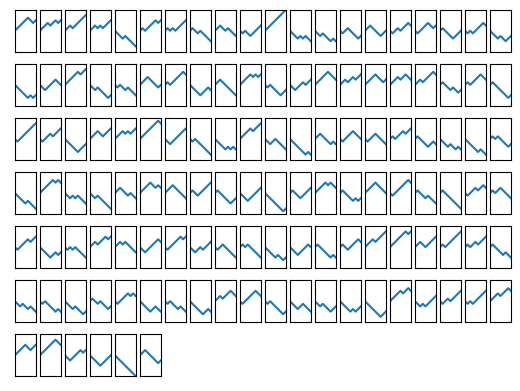

In [14]:
fo = list(forbidden_words)
width = 20
height = math.ceil(len(fo)/width)
fig, axs = plt.subplots(height,width)
n = max(len(w) for w in fo)
for (k,w) in enumerate(fo):
    visualize_charge_words(w,axs[k//width,k%width],n)  
for i in range(len(fo)%width,width):
    axs[height-1,i].axis("off")

In [15]:
fo = list(first_offenders(forbidden_words))
width = 4
height = math.ceil(len(fo)/width)
fig, axs = plt.subplots(height,width)
n = max(len(w) for w in fo)
for (k,w) in enumerate(fo):
    visualize_charge_words(w,axs[k//width,k%width],n,False)  
for i in range(len(fo)%width,width):
    axs[height-1,i].axis("off")

In [19]:
alphabet = (1,-1)
c = 3
def check_charge(w,c):
    if len(w)==0:
        return True
    s = sum(w)
    if (s>c) or (s<-c):
        return False
    if not check_charge(w[:-1],c):
        return False
    if not check_charge(w[1:],c):
        return False
    return True

for i in range(4,16):
    forbidden_words = [w for w in word_list(i,alphabet) if not check_charge(w,c)]
    print(f"i = {i}, num first offenders = {len(first_offenders(forbidden_words))}")


i = 4, num first offenders = 2
i = 5, num first offenders = 2
i = 6, num first offenders = 6
i = 7, num first offenders = 6
i = 8, num first offenders = 14
i = 9, num first offenders = 14
i = 10, num first offenders = 30
i = 11, num first offenders = 30
i = 12, num first offenders = 62
i = 13, num first offenders = 62
i = 14, num first offenders = 126
i = 15, num first offenders = 126
